## 데이터 이해하기
지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴봅시다.

Feature Data 지정하기<br>
Label Data 지정하기<br>
Target Names 출력해 보기<br>
데이터 Describe 해 보기<br>

## 다양한 모델로 학습시켜보기
학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어 봅시다. 어떤 모델이 가장 좋은 성능을 보일까요?

Decision Tree 사용해 보기<br>
Random Forest 사용해 보기<br>
SVM 사용해 보기<br>
SGD Classifier 사용해 보기<br>
Logistic Regression 사용해 보기<br>


## 모델을 평가해 보기
학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
wine_data = load_wine()
wine_data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

### Feature Data 지정

In [3]:
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


### Label Data 지정

In [4]:
wine_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
wine_target = pd.DataFrame(data=wine_data.target, columns=['target'])
wine_target

,target
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


### Target Name

In [6]:
wine_data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### Describe

In [7]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
wine_target.describe()

,target
count,178.000000
mean,0.938202
std,0.775035
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


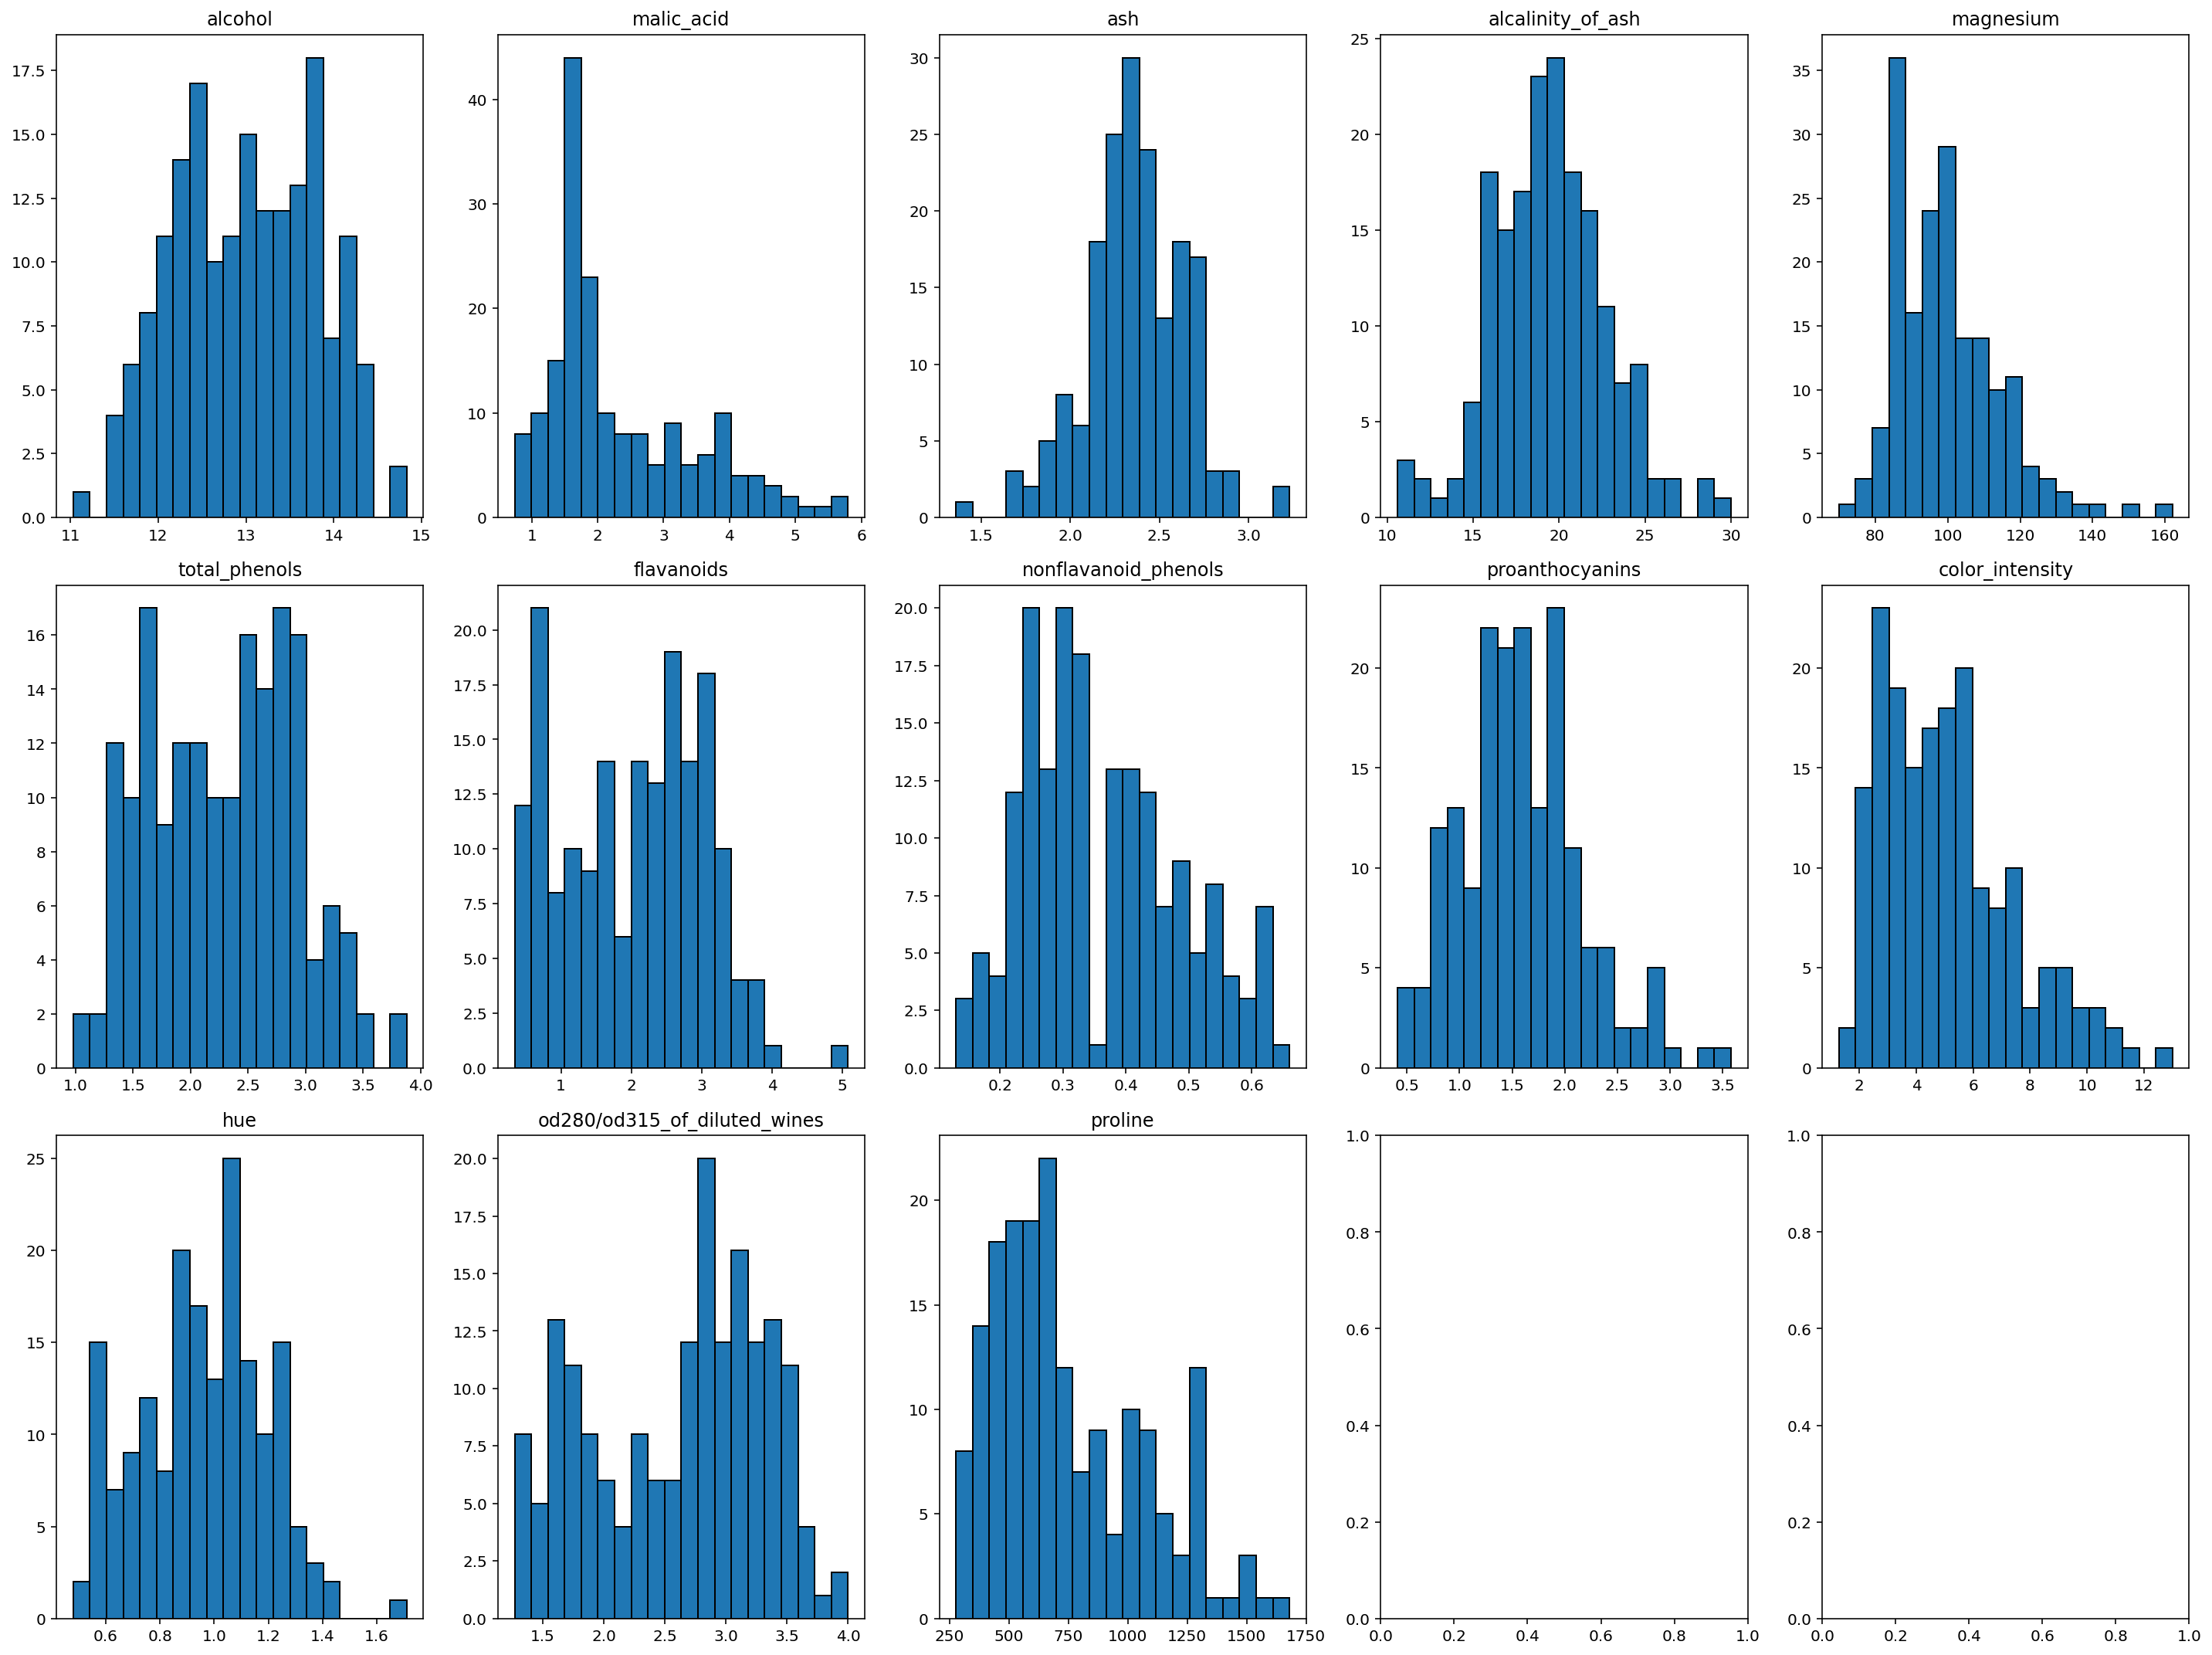

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 15))
for i, column in enumerate(wine_df.columns):
    ax = axes.flatten()[i]
    ax.hist(wine_df[column], bins=20, edgecolor='black')
    ax.set_title(column)

plt.tight_layout()
plt.show()

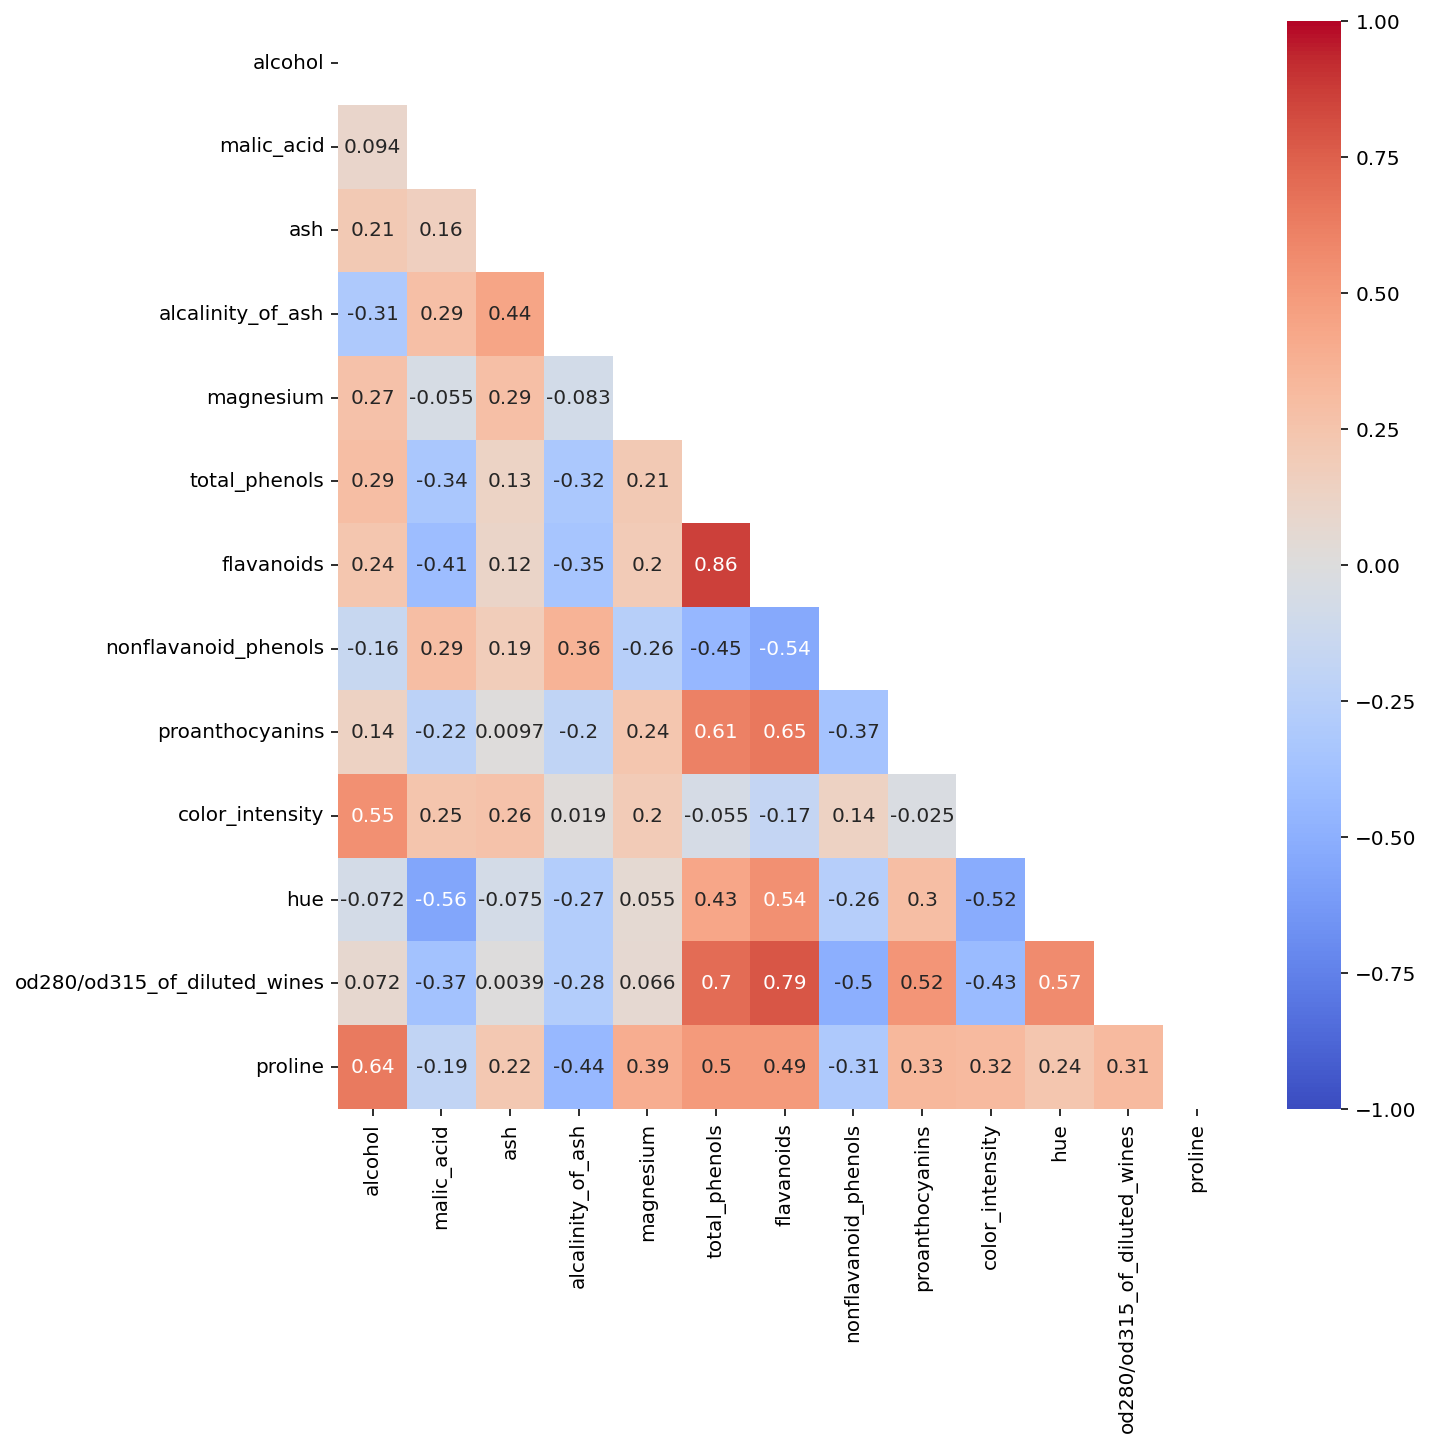

In [10]:
plt.figure(figsize=(10,10))
corr = wine_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, vmin = -1, vmax = 1, mask = mask);

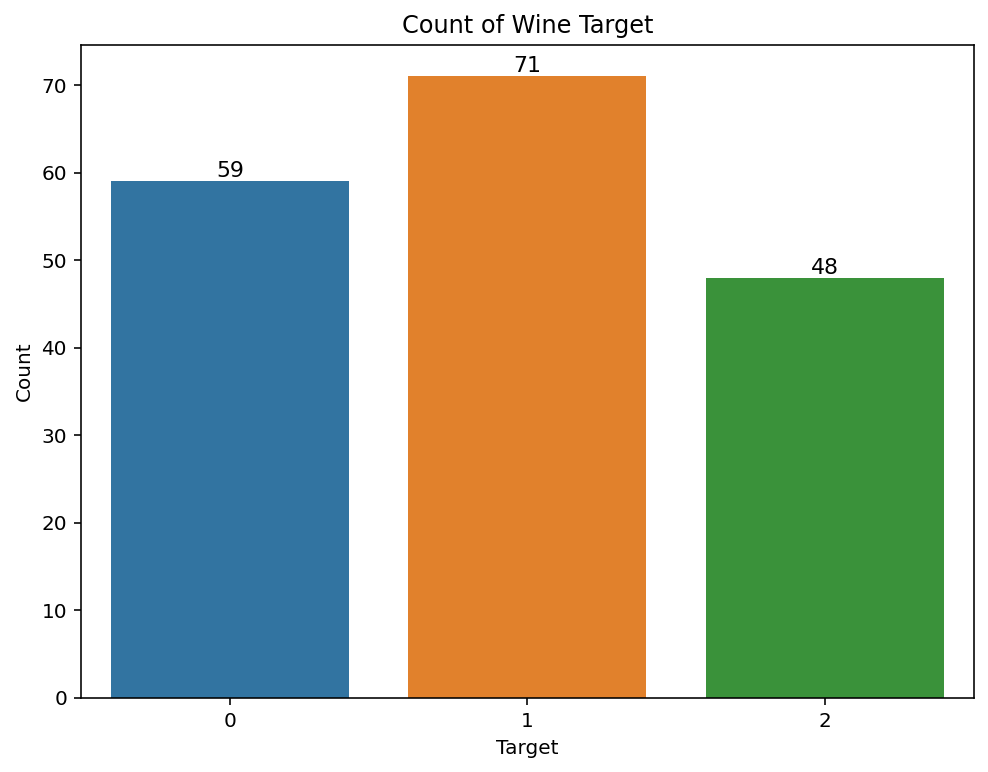

In [11]:
# 와인 데이터셋의 타겟 변수에 대한 카운트 플롯 그리기
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=wine_target['target'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count of Wine Target')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

클래스간 데이터 균형이 불균형 하다는 것을 확인

### train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(wine_df,
                                                   wine_target,
                                                    test_size=0.2,
                                                   random_state=205)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142, 1), (36, 1))

## Base line

### Decision Tree 

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier(random_state=205)
decision_tree.fit(X_train,y_train)
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree 모델의 정확도:", round(accuracy_dt * 100, 2), "%")


Decision Tree 모델의 정확도: 88.89 %


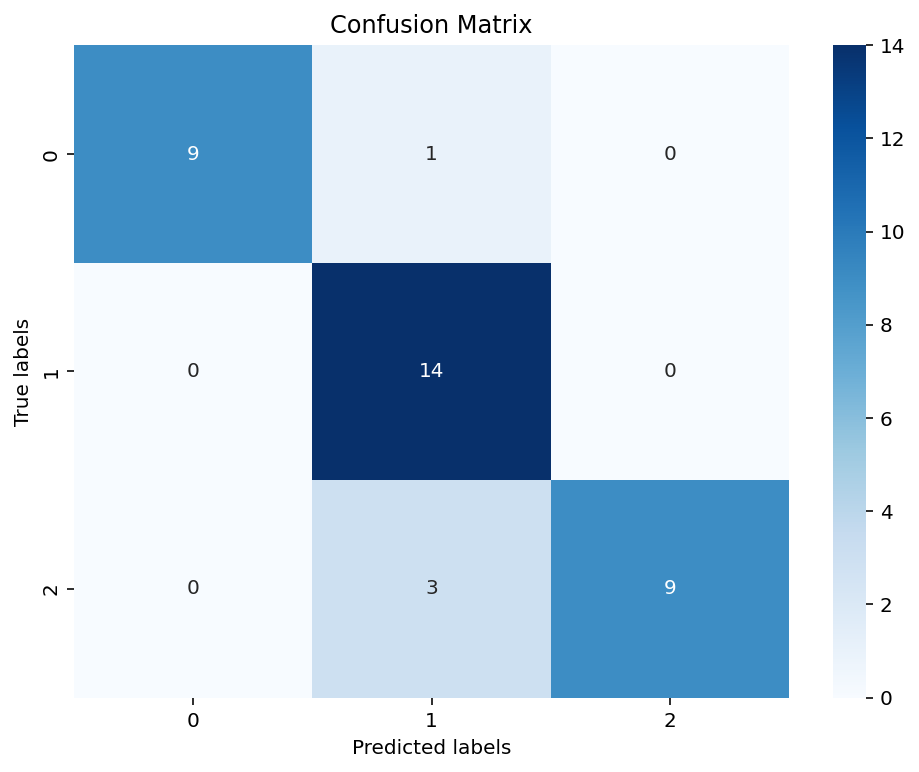

In [15]:
from sklearn.metrics import confusion_matrix


# 혼동 행렬을 생성합니다.
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# 혼동 행렬을 히트맵으로 시각화합니다.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.78      1.00      0.88        14
           2       1.00      0.75      0.86        12

    accuracy                           0.89        36
   macro avg       0.93      0.88      0.89        36
weighted avg       0.91      0.89      0.89        36



### Random Forest 

In [17]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=205)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest 모델의 정확도:", round(accuracy_rf * 100, 2), "%")

Random Forest 모델의 정확도: 100.0 %


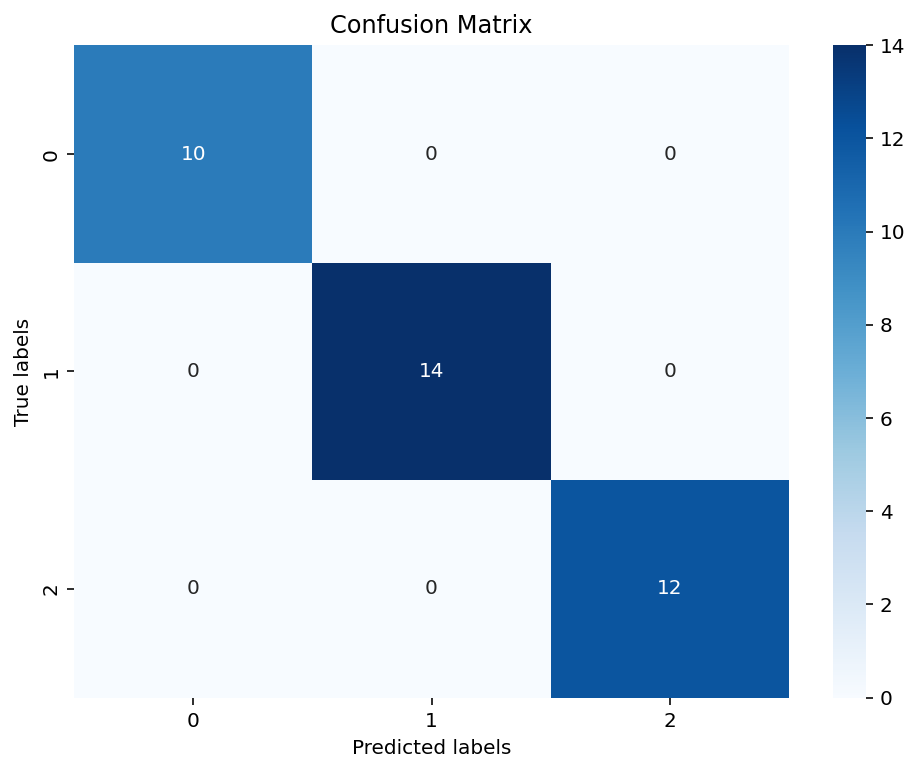

In [18]:
# 혼동 행렬을 생성합니다.
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# 혼동 행렬을 히트맵으로 시각화합니다.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [19]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### SVM

In [20]:
from sklearn import svm
svm_model = svm.SVC(random_state=205)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM 모델의 정확도:", round(accuracy_svm * 100, 2), "%")

SVM 모델의 정확도: 58.33 %


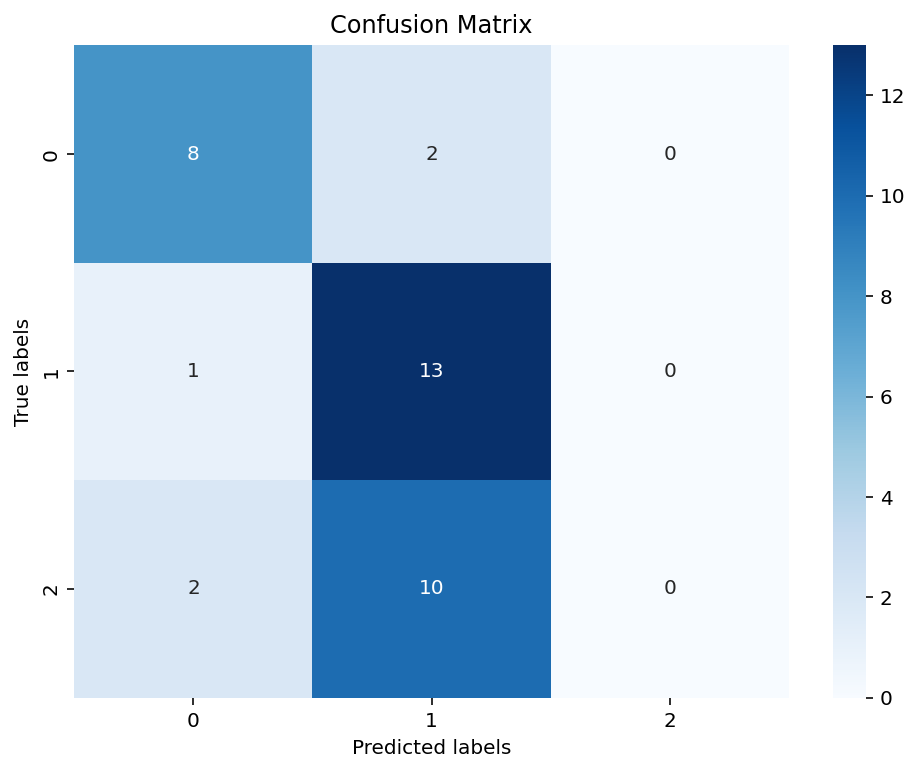

In [21]:
# 혼동 행렬을 생성합니다.
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# 혼동 행렬을 히트맵으로 시각화합니다.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [22]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.52      0.93      0.67        14
           2       0.00      0.00      0.00        12

    accuracy                           0.58        36
   macro avg       0.42      0.58      0.48        36
weighted avg       0.40      0.58      0.47        36



### SGD Classifier

In [23]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(random_state=205)

sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print("SGD 모델의 정확도:", round(accuracy_sgd * 100, 2), "%")

SGD 모델의 정확도: 63.89 %


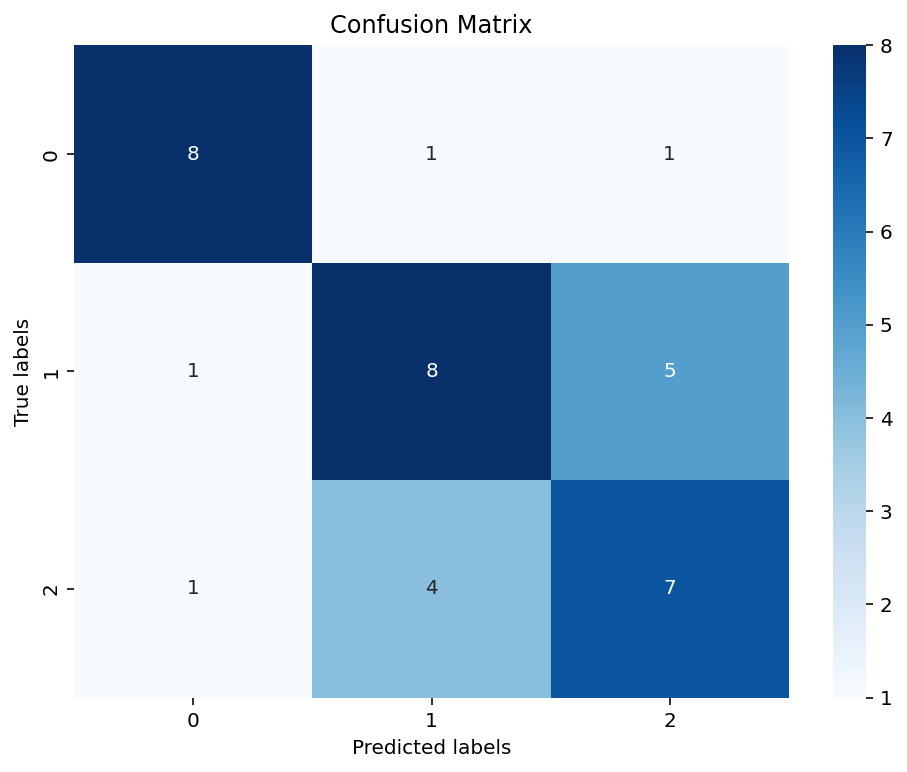

In [24]:
# 혼동 행렬을 생성합니다.
conf_matrix = confusion_matrix(y_test, y_pred_sgd)

# 혼동 행렬을 히트맵으로 시각화합니다.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [25]:
print(classification_report(y_test, y_pred_sgd))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.62      0.57      0.59        14
           2       0.54      0.58      0.56        12

    accuracy                           0.64        36
   macro avg       0.65      0.65      0.65        36
weighted avg       0.64      0.64      0.64        36



### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=205)

logistic_model.fit(X_train, y_train)
y_pred_lr = logistic_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("SGD 모델의 정확도:", round(accuracy_lr * 100, 2), "%")

SGD 모델의 정확도: 91.67 %


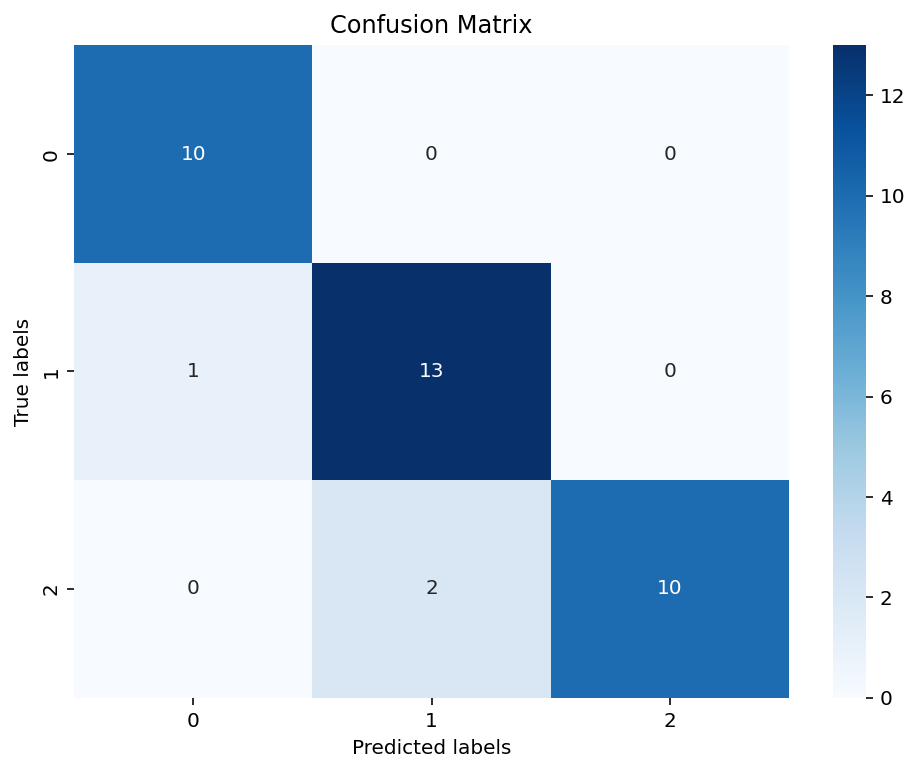

In [27]:
# 혼동 행렬을 생성합니다.
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# 혼동 행렬을 히트맵으로 시각화합니다.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [28]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.87      0.93      0.90        14
           2       1.00      0.83      0.91        12

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



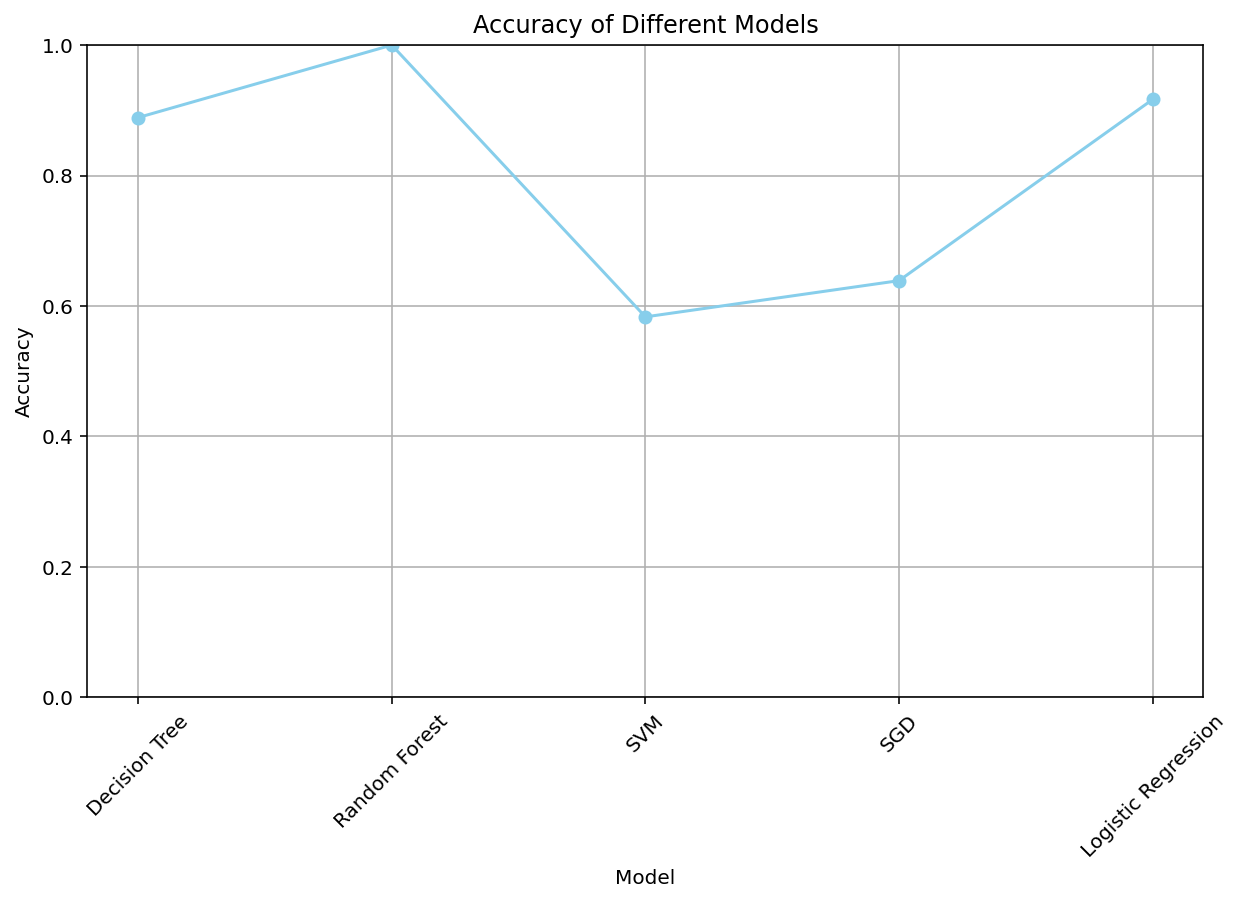

In [29]:
model_names = ['Decision Tree', 'Random Forest', 'SVM', 'SGD', 'Logistic Regression']
accuracies = [accuracy_dt, accuracy_rf, accuracy_svm, accuracy_sgd, accuracy_lr]

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracies, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # y-axis 범위를 0에서 1로 설정하여 정확도를 표시
plt.xticks(rotation=45)  # x 축 레이블을 45도로 회전
plt.grid(True)  # 그리드 추가
plt.show()

## 모델 평가
다양한 모델을 학습하고 평가지표를 보았습니다.<br>
각 클래스간의 데이터가 불균형적이라서 정확도를 선택하는 것 보다<br>
정밀도와 재현율을 고려해보는게 좋아보입니다.<br>
Logistic Regression 모델에 정밀도와 재현율을 고려해보는게 좋아보입니다.
Random Forest 경우 과적합

In [30]:
print("Random Forest 모델의 정확도:", round(accuracy_rf * 100, 2), "%")

Random Forest 모델의 정확도: 100.0 %


In [31]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

